In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from plotfunctions import plot_range, show_map
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from sklearn.metrics import auc

from data_loader import *


## MNIST

(0.8, 1.0)

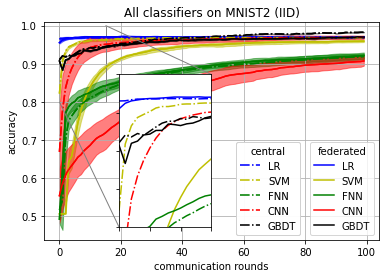

In [77]:
LR_2c_dict = load_2c_LR()
SVM_2c_dict = load_2c_SVM()
FNN_2c_dict = load_2c_FNN()
CNN_2c_dict = load_2c_CNN()
DT_2c_dict = load_2c_DT()

fed_list = [LR_2c_dict["iid 5e2"].T, SVM_2c_dict["iid"].T, FNN_2c_dict["iid"], CNN_2c_dict["iid"], DT_2c_dict["iid"].T]
cent_list = [LR_2c_dict["central 5e2"].T, SVM_2c_dict["cent 5e4"].T, FNN_2c_dict["cent 5e1"], CNN_2c_dict["cent 5e2"], DT_2c_dict["cent"].T]

colors = ['b', 'y', 'g', 'r', 'k']

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]


#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.8
Yh = 1


fig = plt.figure()
ax = plt.axes()


lines_fed = []
lines_cent = []
for fed, cent, color in zip(fed_list, cent_list, colors):
    line_fed = plot_range(fed, color=color)
    line_cent = plot_range(cent, "-.", color=color)
    
    ax.add_artist(line_fed)
    ax.add_artist(line_cent)
        
    lines_fed.append(line_fed)
    lines_cent.append(line_cent)
    
    #axins.plot(fed)
legend1 = plt.legend(lines_fed, legend_labels, loc=4, title= "federated")
legend2 = plt.legend(lines_cent, legend_labels, loc=4, title= "central", bbox_to_anchor=(0.78,0))

ax.add_artist(legend1)
ax.add_artist(legend2)

ax.grid(True)
ax.set_title("All classifiers on MNIST2 (IID)")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")
    
axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(175,125))
for fed, cent, color in zip (fed_list, cent_list, colors):
    axins.plot(np.mean(fed, axis = 0), color=color)
    axins.plot(np.mean(cent, axis = 0), "-.", color = color)
    
    
    
    
    

plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)

mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")


axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)

Text(0, 0.5, 'accuracy')

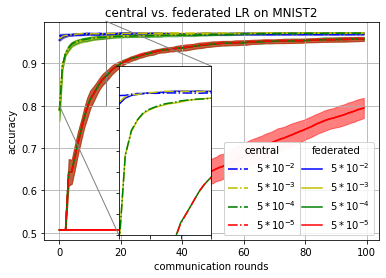

In [56]:
LR_2c_dict = load_2c_LR()


plot_keys_fed = ["iid 5e2", "iid 5e3", "iid 5e4", "iid 5e5"]
plot_keys_cent = ["central 5e2", "central 5e3", "central 5e4", "central 5e5"]
colors = ['b', 'y', 'g', 'r', 'k']
legend_labels = ["$5*10^{-2}$", "$5*10^{-3}$", "$5*10^{-4}$", "$5*10^{-5}$"]


#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.8
Yh = 1

lines_fed = []
lines_cent = []

fig = plt.figure()
ax = plt.axes()
#axins = zoomed_inset_axes(ax, 2, loc=10)


#ax.plot(LR_2c_dict["iid 5e2"])
#axins.plot(LR_2c_dict["iid 5e2"])


for key_fed, key_cent, color in zip(plot_keys_fed, plot_keys_cent, colors):
    line_fed = plot_range(LR_2c_dict[key_fed].T, color = color)
    line_cent = plot_range(LR_2c_dict[key_cent].T, "-.", color = color)
    
    ax.add_artist(line_fed)
    ax.add_artist(line_cent)
    
    lines_fed.append(line_fed)
    lines_cent.append(line_cent)

    
legend1 = plt.legend(lines_fed, legend_labels, loc=4, title= "federated")    
legend2 = plt.legend(lines_cent, legend_labels, loc=4, title= "central", bbox_to_anchor=(0.78,0))
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(175,125))

for key_fed, key_cent, color in zip(plot_keys_fed, plot_keys_cent, colors):
    mean_fed = np.mean(LR_2c_dict[key_fed],axis=1)
    mean_cent = np.mean(LR_2c_dict[key_cent], axis=1)
    
    axins.plot(mean_fed, color=color)
    axins.plot(mean_cent,"-.", color=color)
    
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
  
#axins.plot(LR_2c_dict["ci"][:,1],color= 'y')
#axins.plot(LR_4c_dict["ci"][:,1],"-.", color= 'y')
axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
ax.grid(True)
ax.set_title("central vs. federated LR on MNIST2")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")


Text(0, 0.5, 'accuracy')

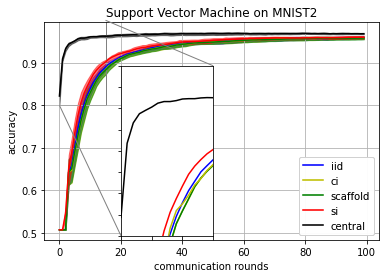

In [43]:
SVM_2c_dict = load_2c_SVM()

plot_keys = ["iid", "ci", "scaf", "si", "cent 5e4"]
colors = ['b', 'y', 'g', 'r', 'k']
legend = ["iid", "ci", "scaffold", "si", "central"]

Xl = 0
Xh = 15

Yl = 0.8
Yh = 1


lines = []

fig = plt.figure()
ax = plt.axes()

for key, color in zip(plot_keys, colors):
    line = plot_range(SVM_2c_dict[key].T, color=color)
    
    #ax.add_artist(line)
    
    lines.append(line)

    
    
    
legend = plt.legend(lines, legend, loc=4)
plt.gca().add_artist(legend)
plt.grid(True)

axins = zoomed_inset_axes(ax, 2, bbox_to_anchor = (228,215))
axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")

for key, color in zip(plot_keys, colors):
    axins.plot(np.mean(SVM_2c_dict[key], axis=1), color=color)

axins.plot(SVM_2c_dict["ci"][:,0], color="y")
ax.set_title("Support Vector Machine on MNIST2")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")

Text(0, 0.5, 'accuracy')

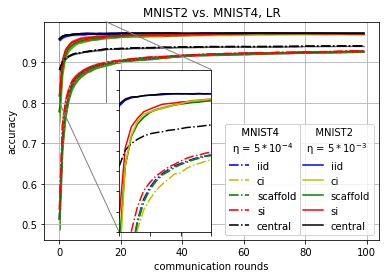

In [41]:
LR_2c_dict = load_2c_LR()
LR_4c_dict = load_4c_LR()

plot_keys_2c = ["iid 5e2", "ci", "scaf", "si", "central 5e3"]
plot_keys_4c = ["iid", "ci", "scaf", "si", "central 5e4"]
colors = ['b', 'y', 'g', 'r', 'k']
legend = ["iid", "ci", "scaffold", "si", "central"]

#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.8
Yh = 1

lines_2c = []
lines_4c = []


fig = plt.figure()
ax = plt.axes()
#axins = zoomed_inset_axes(ax, 2, loc=10)


#ax.plot(LR_2c_dict["iid 5e2"])
#axins.plot(LR_2c_dict["iid 5e2"])


for key_2c, key_4c, color in zip(plot_keys_2c, plot_keys_4c, colors):
    line_2c = plot_range(LR_2c_dict[key_2c].T, color = color)
    line_4c = plot_range(LR_4c_dict[key_4c].T, "-.", color = color)
    
    ax.add_artist(line_2c)
    ax.add_artist(line_4c)
    
    lines_2c.append(line_2c)
    lines_4c.append(line_4c)

    
    
legend1 = plt.legend(lines_2c, legend, loc=4, title= "   MNIST2 \n\u03B7 = $5*10^{-3}$")
legend2 = plt.legend(lines_4c, legend, loc=4, title= "   MNIST4 \n\u03B7 = $5*10^{-4}$", bbox_to_anchor=(0.78,0))
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(175,125))

for key_2c, key_4c, color in zip(plot_keys_2c, plot_keys_4c, colors):
    mean_2c = np.mean(LR_2c_dict[key_2c],axis=1)
    mean_4c = np.mean(LR_4c_dict[key_4c], axis=1)
    
    axins.plot(mean_2c, color=color)
    axins.plot(mean_4c,"-.", color=color)
    
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
  
axins.plot(LR_2c_dict["ci"][:,1],color= 'y')
axins.plot(LR_4c_dict["ci"][:,1],"-.", color= 'y')
axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
ax.grid(True)
ax.set_title("MNIST2 vs. MNIST4, LR")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")


Text(0, 0.5, 'accuracy')

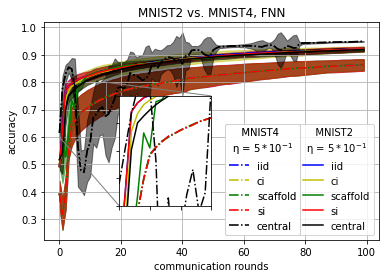

In [9]:
FNN_2c_dict = load_2c_FNN()
FNN_4c_dict = load_4c_FNN()

plot_keys_2c = ["iid", "ci", "scaf", "si", "cent 5e1"]
plot_keys_4c = ["iid", "ci new", "scaf", "si", "cent 5e1"]
colors = ['b', 'y', 'g', 'r', 'k']
legend = ["iid", "ci", "scaffold", "si", "central"]

#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.6
Yh = 0.8

lines_2c = []
lines_4c = []


fig = plt.figure()
ax = plt.axes()
#axins = zoomed_inset_axes(ax, 2, loc=10)


#ax.plot(FNN_2c_dict["iid 5e2"])
#axins.plot(FNN_2c_dict["iid 5e2"])


for key_2c, key_4c, color in zip(plot_keys_2c, plot_keys_4c, colors):
    line_2c = plot_range(FNN_2c_dict[key_2c], color = color)
    line_4c = plot_range(FNN_4c_dict[key_4c], "-.", color = color)
    
    ax.add_artist(line_2c)
    ax.add_artist(line_4c)
    
    lines_2c.append(line_2c)
    lines_4c.append(line_4c)

    
    
legend1 = plt.legend(lines_2c, legend, loc=4, title= "   MNIST2 \n\u03B7 = $5*10^{-1}$")
legend2 = plt.legend(lines_4c, legend, loc=4, title= "   MNIST4 \n\u03B7 = $5*10^{-1}$", bbox_to_anchor=(0.78,0))
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(175,125))

for key_2c, key_4c, color in zip(plot_keys_2c, plot_keys_4c, colors):
    mean_2c = np.mean(FNN_2c_dict[key_2c],axis=0)
    mean_4c = FNN_4c_dict[key_4c][0,:]
    
    axins.plot(mean_2c, color=color)
    axins.plot(mean_4c,"-.", color=color)


plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
  
#axins.plot(FNN_2c_dict["ci"][:,1],color= 'y')
#axins.plot(FNN_4c_dict["ci"][:,1],"-.", color= 'y')
axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
ax.grid(True)
ax.set_title("MNIST2 vs. MNIST4, FNN")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")


## Fashion MNIST



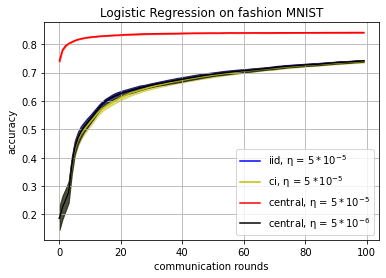

In [2]:
LR_dict = load_f_LR()

plot_range(LR_dict["iid"].T[:,0:100], color="b")
plot_range(LR_dict["ci"].T[:,0:100], color="y")
plot_range(LR_dict["central 5e5"].T[:,0:100], color="r")
plot_range(LR_dict["central 5e6"].T, color="k")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("Logistic Regression on fashion MNIST")
plt.legend(["iid, \u03B7 = $5*10^{-5}$","ci, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-6}$"], loc=4)


Text(0.5, 1.0, 'CNN on fashion MNIST')

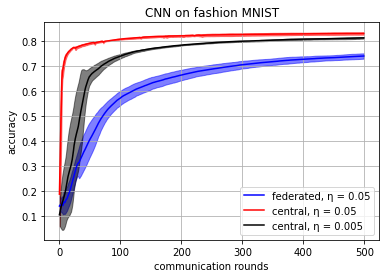

In [32]:
CNN_dict = load_f_CNN()

plot_range(CNN_dict["iid"].T, color="b")
plot_range(CNN_dict["cent 5e2"].T, color="r")
plot_range(CNN_dict["cent 5e3"].T, color="k")
plt.legend(["federated, \u03B7 = 0.05","central, \u03B7 = 0.05", "central, \u03B7 = 0.005"],loc=4)
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("CNN on fashion MNIST")

Text(0.5, 1.0, 'GBDT on fashion MNIST')

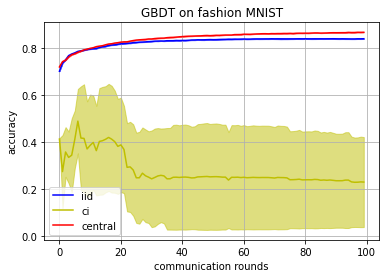

In [12]:
DT_dict = load_f_DT()

plot_range(DT_dict["iid"].T, color="blue")
plot_range(DT_dict["ci"].T, color="y")
plot_range(DT_dict["cent"].T, color="r")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid", "ci", "central"])
plt.title("GBDT on fashion MNIST")

## A2

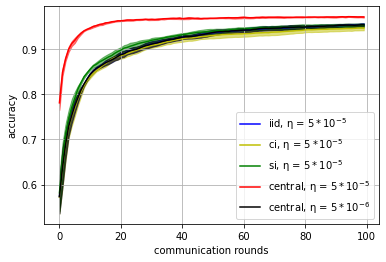

In [42]:
SVM_dict = load_A2_SVM()

plot_range(SVM_dict["iid"].T, color="b")
plot_range(SVM_dict["ci"].T, color="y")
plot_range(SVM_dict["si"].T, color="g")
plot_range(SVM_dict["central"].T[:,0:100], color="r")
plot_range(SVM_dict["central 5e6"].T[:,0:100], color="k")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid, \u03B7 = $5*10^{-5}$","ci, \u03B7 = $5*10^{-5}$","si, \u03B7 = $5*10^{-5}$" ,"central, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-6}$"], loc=4)


## AML

Text(0.5, 1.0, 'Logistic Regression on AML')

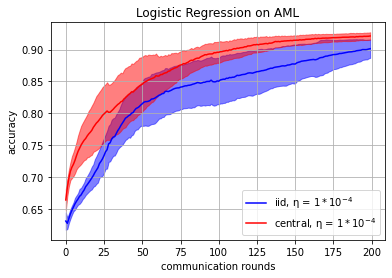

In [6]:
LR_dict = load_3node_LR()

plot_range(LR_dict["iid"], color="b")
plot_range(LR_dict["central"], color="r")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid, \u03B7 = $1*10^{-4}$","central, \u03B7 = $1*10^{-4}$"], loc=4)
plt.title("Logistic Regression on AML")


Text(0, 0.5, 'accuracy')

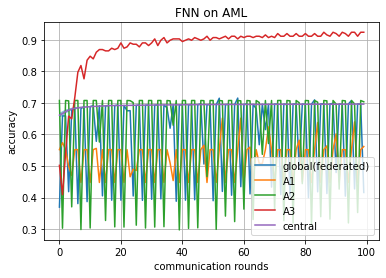

In [63]:
FNN_dict = load_3node_FNN()

plt.plot(np.arange(100), FNN_dict["ci"])
for i in range(3):
    plt.plot(np.arange(100), FNN_dict["ci local"][i,:,:])
plot_range(FNN_dict["central"])
plt.legend(["global(federated)", "A1", "A2", "A3", "central"])
plt.title("FNN on AML")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")

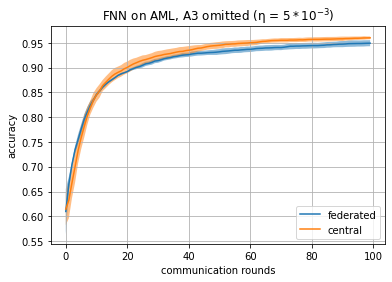

In [5]:
FNN_dict = load_2node_FNN()

plot_range(FNN_dict["iid"].T)
plot_range(FNN_dict["central"])
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("FNN on AML, A3 omitted (\u03B7 = $5*10^{-3}$)")
plt.legend(["federated", "central"])

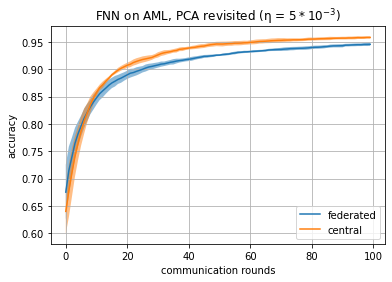

In [4]:
FNN_dict = load_3node_FNN()

plot_range(FNN_dict["redemp g"])
plot_range(FNN_dict["redemp central"])
#plot_range(FNN_dict["redemp central lr"])
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("FNN on AML, PCA revisited (\u03B7 = $5*10^{-3}$)")
plt.legend(["federated", "central"])